In [1]:
import pandas as pd
import os
import numpy as np
from skimage import color, io, measure, img_as_ubyte
import matplotlib.pyplot as plt
import cv2

In [2]:
boxes = pd.read_csv("data/CUB_200_2011/bounding_boxes.txt", delimiter=' ', header=  None, index_col= 0)
boxes = boxes.astype(int)


In [55]:
images = pd.read_csv("data/CUB_200_2011/images.txt", header = None, delimiter= ' ', index_col= 0 )
img_list = images.values.tolist() #made indexing more confusing because it didn't fit boxes df


In [4]:
img_path = "data/CUB_200_2011/images/"

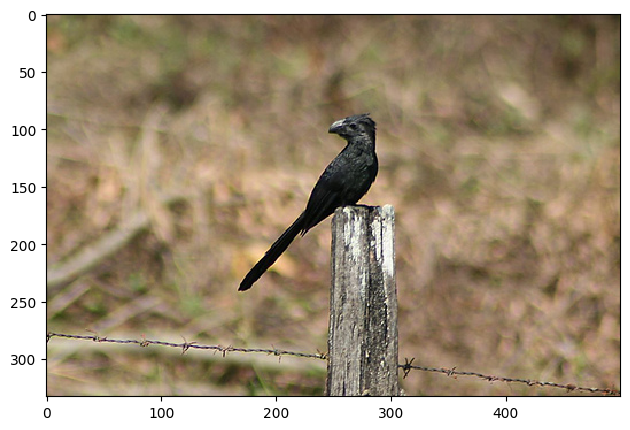

In [5]:
test= io.imread(img_path+images.iloc[200].values[0])
io.imshow(test)

In [6]:
x, y,width, height = boxes.iloc[200].values

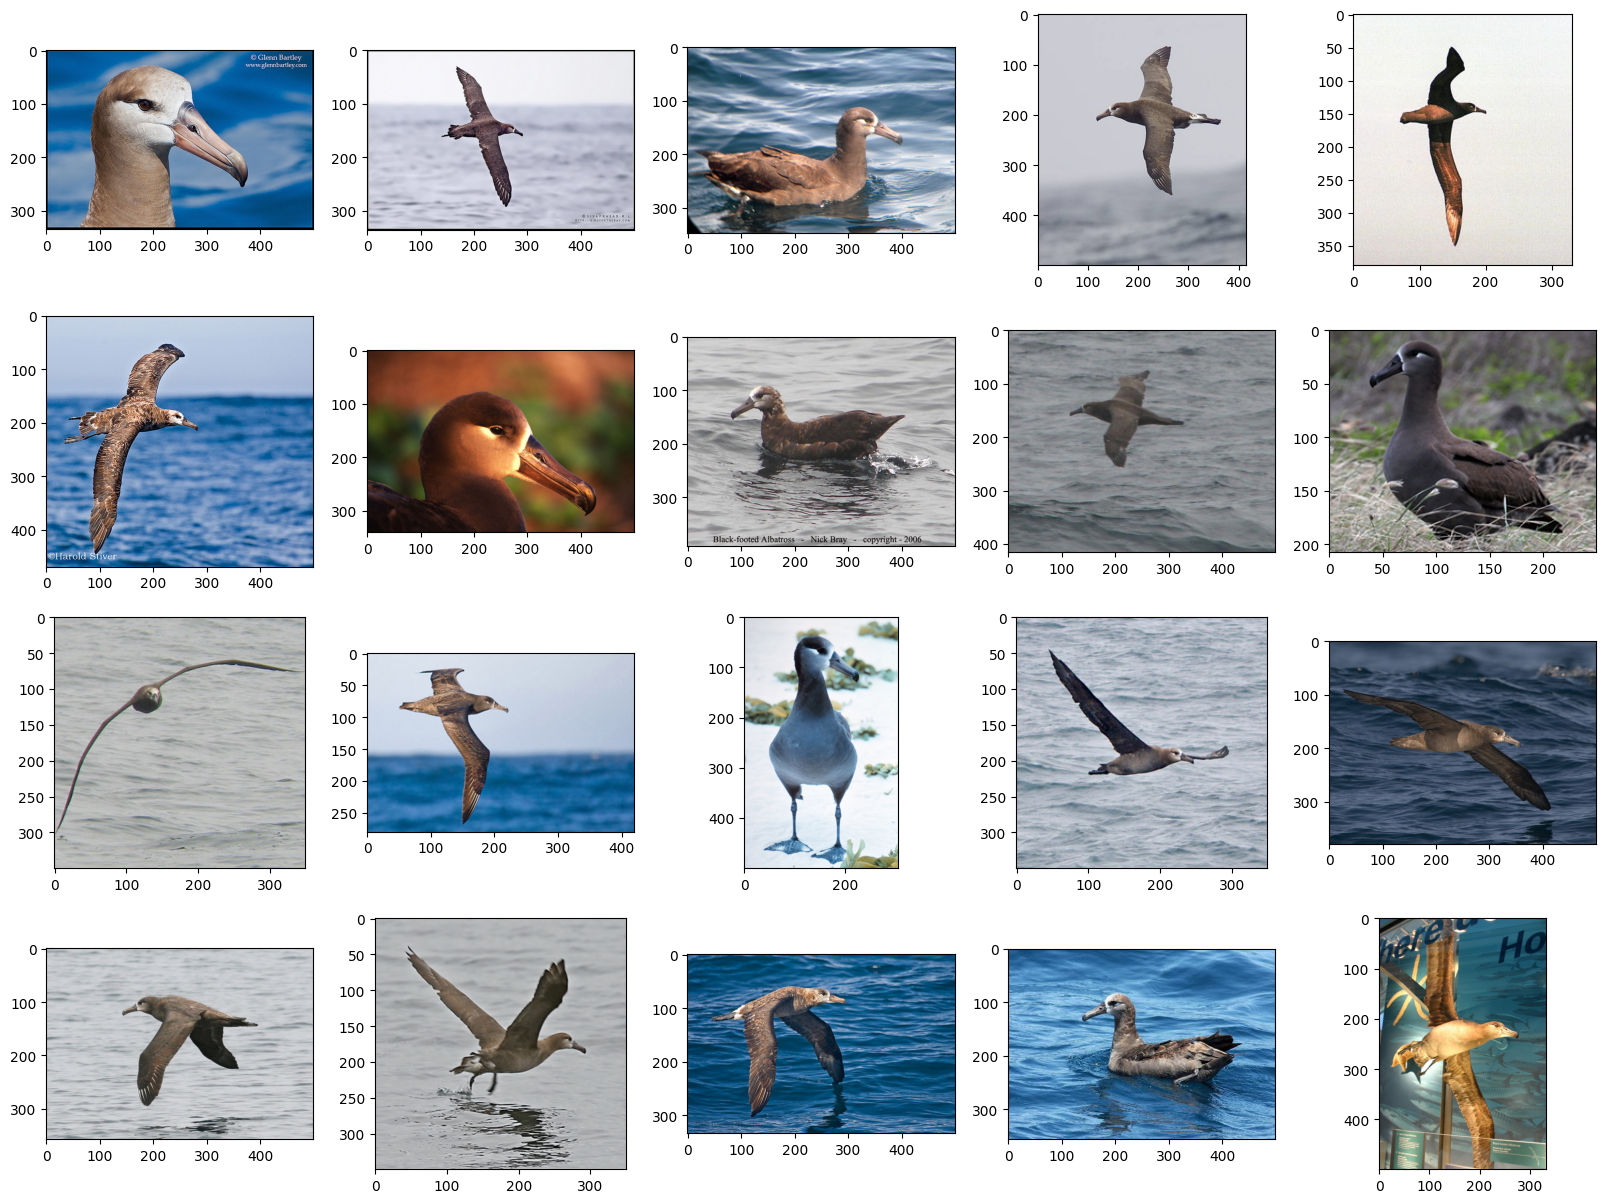

In [8]:
fig, ax = plt.subplots(nrows = 4, ncols=5, figsize = (20,15))
count = 0
for i in range(4):
    for j in range(5):
        img = io.imread(img_path+images.iloc[count].values[0])
        ax[i,j].imshow(img)
        count += 1

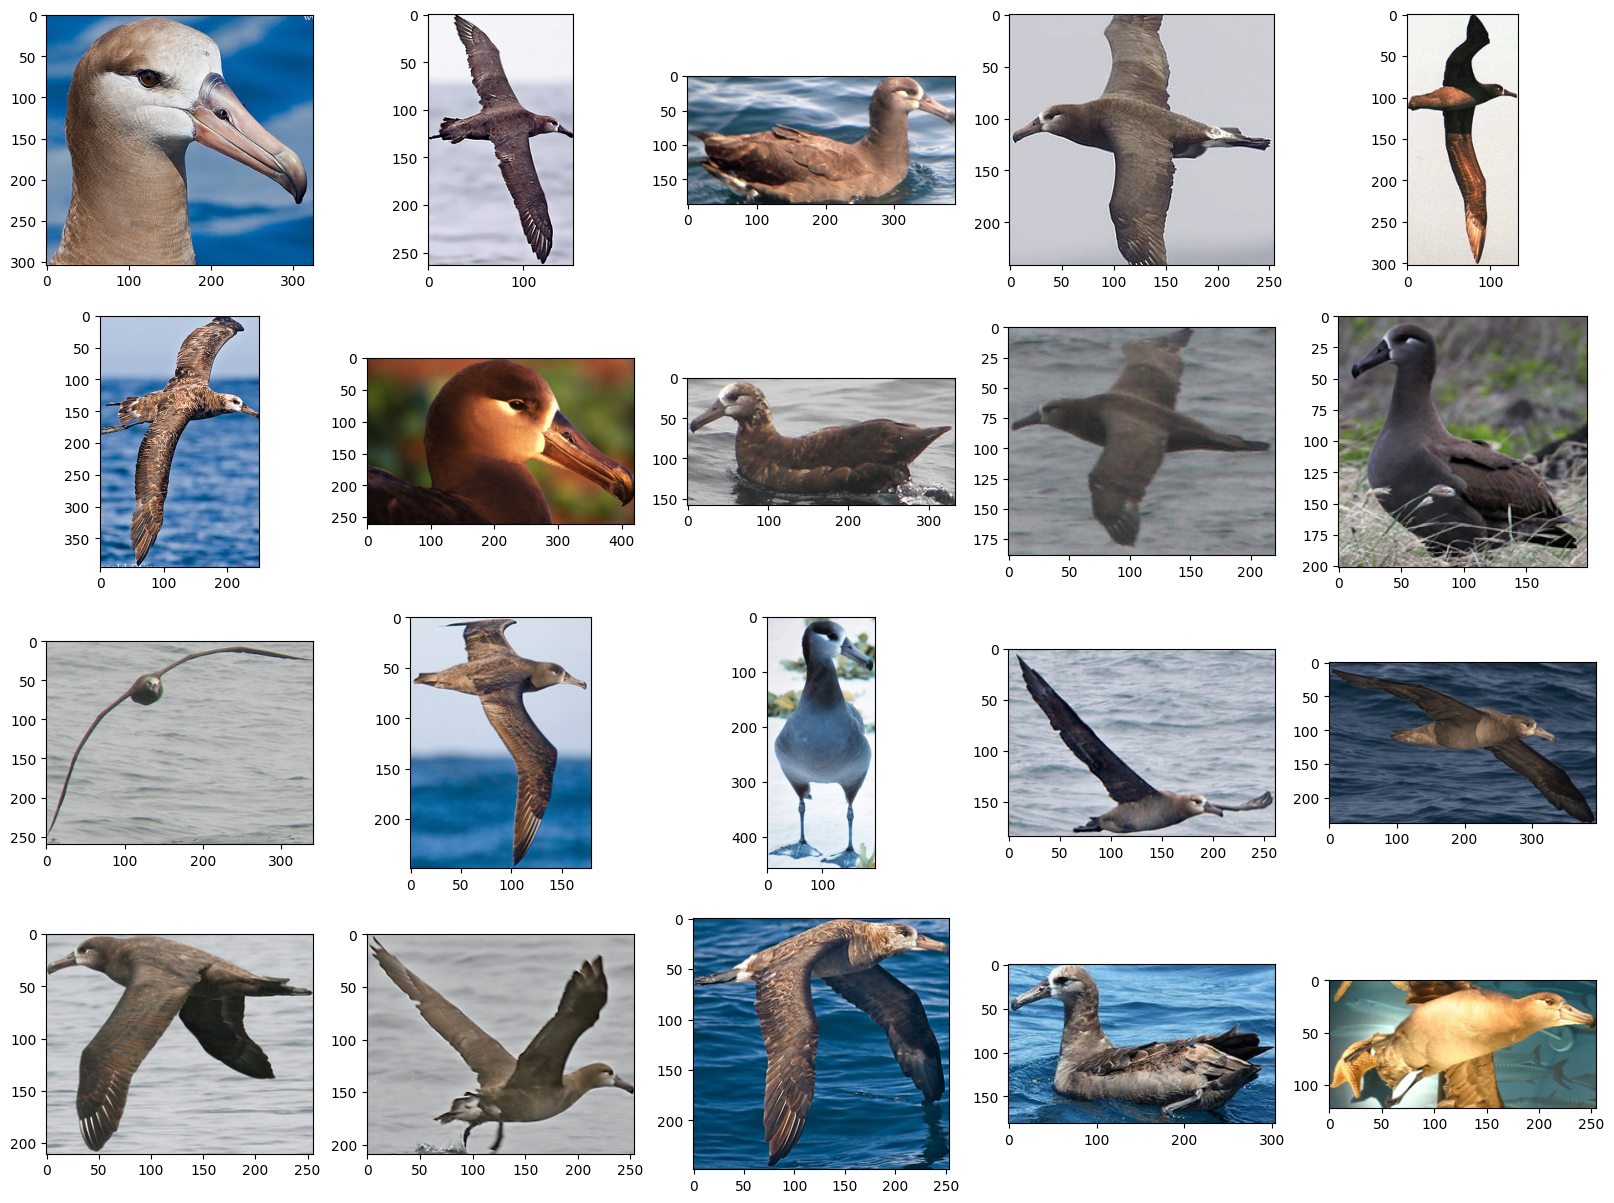

In [10]:
fig, ax = plt.subplots(nrows = 4, ncols=5, figsize = (20,15))
count = 0
for i in range(4):
    for j in range(5):
        img = io.imread(img_path+images.iloc[count].values[0])
        x, y, width, height = boxes.iloc[count].values
        img = img[y:y+height,x:x+width]
        ax[i,j].imshow(img)
        count += 1

In [22]:
crop_path = "cropped/"

In [35]:
images.values[0][0][]

SyntaxError: invalid syntax (3976677767.py, line 1)

In [81]:
#3. Crop the images using information from bounding_boxes.txt (included in the dataset)
for count, file in enumerate(images.values):
    img = io.imread(img_path+images.iloc[count].values[0])
    x, y, width, height = boxes.iloc[count].values
    img = img[y:y+height,x:x+width]
    io.imsave(crop_path+str(count+1)+'.jpg', img)

In [69]:
#4. Split the cropped images into training and test sets, using train_test_split.txt (included in the dataset)
import shutil
test_path = "datasets/cub200_cropped/train_cropped/"
train_path = "datasets/cub200_cropped/test_cropped/"
crop_path

'cropped/'

In [72]:
split = pd.read_csv('data/CUB_200_2011/train_test_split.txt', delimiter=' ', header  = None)
split
#1 = training, 0 = test

0  1
0          1  0
1          2  1
2          3  0
3          4  1
4          5  1
...      ... ..
11783  11784  1
11784  11785  0
11785  11786  0
11786  11787  1
11787  11788  0

[11788 rows x 2 columns]

In [76]:
def makedir(path):
    '''
    if path does not exist in the file system, create it
    '''
    if not os.path.exists(path):
        os.makedirs(path)


In [83]:
for count, im in enumerate(split.values):
    if im[1] == 0:
        makedir(test_path+images.values[count][0].split('/')[0])
        img_path = images.values[count][0]
        shutil.move(crop_path+str(count+1)+".jpg",test_path+img_path)
    elif im[1] == 1:
        makedir(train_path+images.values[count][0].split('/')[0])
        img_path = images.values[count][0]
        shutil.move(crop_path+str(count+1)+".jpg",train_path+img_path)
